---
# Step 6: Visualize Your Data
Now, we will experiment and explore different functions to visualize your data. We are going to visualize your data using a package called `quicklook`. The goal here is to mess around with all of these functions and learn through trial-and-error.

---

## 1. Import packages

In [2]:
import pandas as pd
import numpy as np
from os import path as fp
import quicklook

## 2. Import the cleaned Data

### Import your cleaned data into this notebook:
- In the cell below import your cleaned data. If you need a refresher on using relative filepaths to import data, refer back to #2 in the [step 4 notebook](https://github.com/alexdsbreslav/python_for_uxr/blob/master/step4_clean_your_data/step4_workbook.ipynb) 

### Import the example data into this notebook:
I'll be using this data to show examples, so it may be helpful to have on hand!

In [3]:
example_df = pd.read_excel(fp.join(fp.dirname(fp.abspath('')), 'data', 'raw_data', 'user_data.xlsx'), engine='openpyxl')

## 3. Distribution Plots
Distribution plots, like histograms, are invaluable for understanding the statistical properties of continuous variables. They show the central tendency and variability of a variable all in one plot. They are also the best way to understand how continuous variables differ between groups.

Here I'll use the `add_distribuition_plot()` function to compare `sessions_in_app_30_days` across `device_type`.

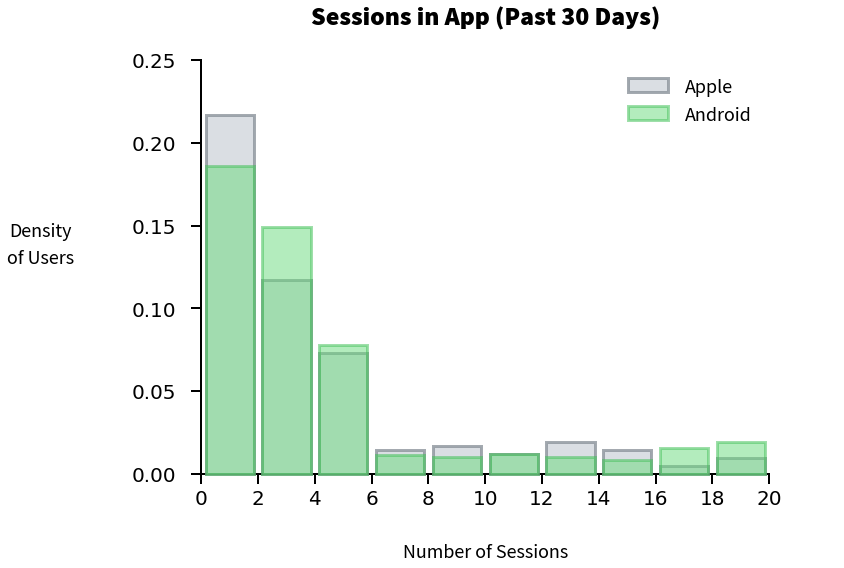

In [56]:
# ---- build chart skeleton 
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'Sessions in App (Past 30 Days)',
xlabel = 'Number of Sessions',
ylabel = 'Density\nof Users',
x_min_max = (0,20), y_min_max = (0,0.25),
xtick_interval = 2, ytick_interval = 0.05,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add apple histogram
quicklook.add_distribution_plot(chart_skeleton,
data = example_df[example_df.device_type == 'apple'].sessions_in_app_30_days,
override_chart_skeleton = False,
distribution_min_max = (0,20),
bin_interval = 2,
plot_as_density = True,
color_name = 'gray', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 0.75,
label_for_legend = 'Apple',
layer_order = 1)

# ---- add android histogram
quicklook.add_distribution_plot(chart_skeleton,
data = example_df[example_df.device_type == 'android'].sessions_in_app_30_days,
override_chart_skeleton = False,
distribution_min_max = (0,20),
bin_interval = 2,
plot_as_density = True,
color_name = 'green', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 0.5,
label_for_legend = 'Android',
layer_order = 1)

# ---- add legend
quicklook.add_legend(chart_skeleton,
legend_location = 'best', frame_around_legend=False);

- [Right-click here](https://github.com/alexdsbreslav/quicklook/blob/master/how_to_use_quicklook/add_distribution_plot.md) to open step-by-step directions for plotting a histogram.
- Then, referring to the directions, create a histogram of a new continuous variable from the `example_df` or from your data.

## 4. Bar Plots
Bar plots are a simple way to show a summary of central tendency and variability. They do not included as much detail as a distribution plot, but are easier to understand, and gather the key takeaway from!

Here I'll use the `add_bar_plot()` function to compare the number of `monthly_active_user` across `device_type` and `market`.

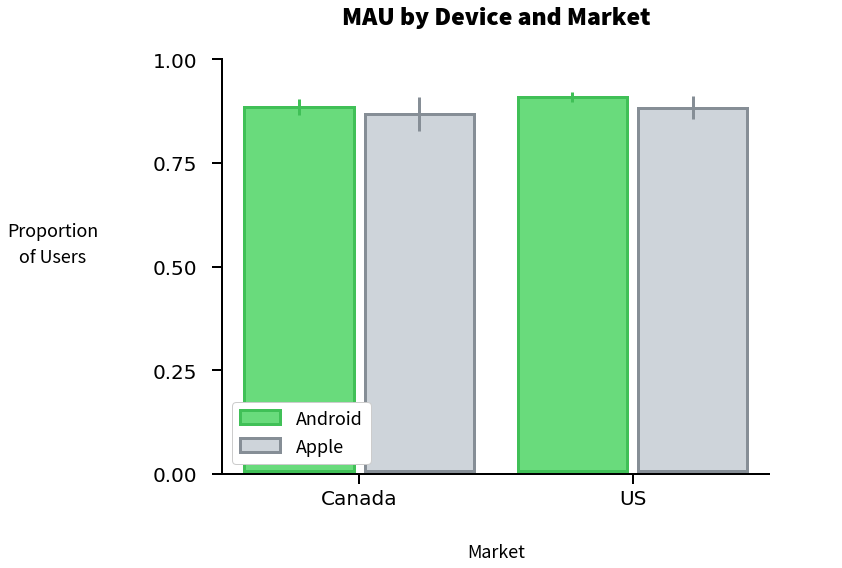

In [57]:
# ---- build the chart skeleton
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'MAU by Device and Market',
xlabel = 'Market',
ylabel = 'Proportion\nof Users',
x_min_max = (0,1), y_min_max = (0,1),
xtick_interval = 0.25, ytick_interval = 0.25,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- create a for loop to plot two sets of bars
# ---- first, create the green bars on the left
# ---- then, create the gray bars on the right
for i in range(2):
    device = ['android', 'apple'][i]
    
    quicklook.add_bar_plot(chart_skeleton,
    x_labels = ['Canada', 'US'],
    y = example_df.groupby(['device_type', 'market']).monthly_active_user.mean().loc[device],
    y_error = example_df.groupby(['device_type', 'market']).monthly_active_user.sem().loc[device], #If no values, None
    bars_at_each_xlabel = 2,
    bar_index = i,
    color_name = 'gray' if device == 'apple' else 'green', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
    color_brightness = 'default', #['default', 'light', 'dark']
    opacity = 1,
    label_for_legend = str.title(device),
    layer_order = 1)

# --- add legend
quicklook.add_legend(chart_skeleton,
legend_location = 'lower left', frame_around_legend=True);

- [Right-click here](https://github.com/alexdsbreslav/quicklook/blob/master/how_to_use_quicklook/add_bar_plot.md) to open step-by-step directions for plotting a bar plot.
- Then, referring to the directions, create a bar plot of a new variable from the `example_df` or from your data.

## 5. Scatter Plots
Scatter plots are most useful for visualizing the relationship between two continuous variables.

Here I'll use the `add_scatter_plot()` function to examine the relationship between `sessions_in_app_30_days` and `searches_in_app_30_days`.

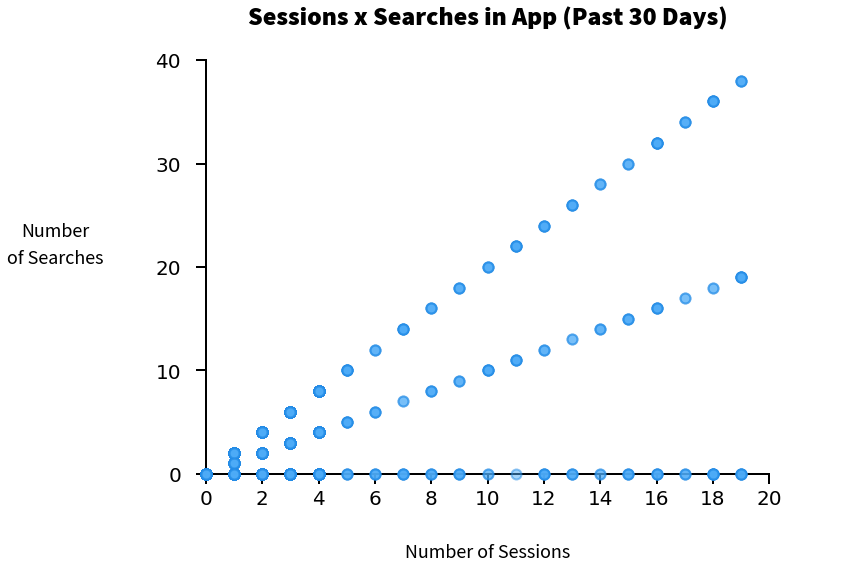

In [68]:
# ---- build chart skeleton 
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'Sessions x Searches in App (Past 30 Days)',
xlabel = 'Number of Sessions',
ylabel = 'Number\nof Searches',
x_min_max = (0,20), y_min_max = (0,40),
xtick_interval = 2, ytick_interval = 10,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add scatterplot
quicklook.add_scatter_plot(chart_skeleton,
x = example_df.sessions_in_app_30_days,
y = example_df.searches_in_app_30_days,
x_error = None, #If no values, None
y_error = None, #If no values, None
color_name = 'blue', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
marker_shape = 'o', #['o', '.', 'v', '^', 's', 'd', 'D', 'X', 'x']
opacity = 0.5,
label_for_legend = '',
layer_order = 1)

- [Right-click here](https://github.com/alexdsbreslav/quicklook/blob/master/how_to_use_quicklook/add_scatter_plot.md) to open step-by-step directions for plotting a scatter plot.
- Then, referring to the directions, create a scatter plot of two continuous variables from the `example_df` or from your data.

## 4. Line Plots
Line plots are most useful for visualizing change of a continuous variable and a function of another continuous variable. Most often, people use line plots to show change over time.

Here I'll use the `add_line_plot()` function to show how `searches_in_app_30_days` changes as a function of the number of `sessions_in_app_30_days.

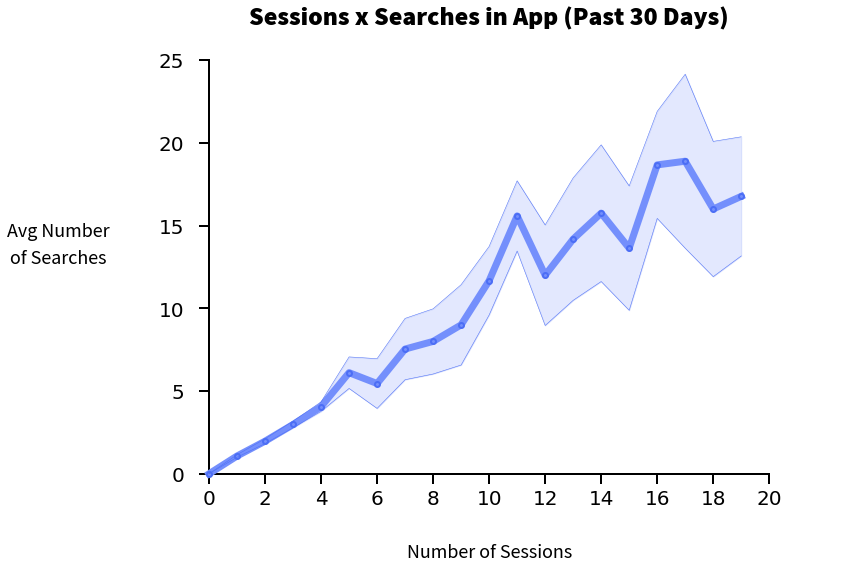

In [72]:
# ---- build chart skeleton 
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'Sessions x Searches in App (Past 30 Days)',
xlabel = 'Number of Sessions',
ylabel = 'Avg Number\nof Searches',
x_min_max = (0,20), y_min_max = (0,25),
xtick_interval = 2, ytick_interval = 5,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add line plot
quicklook.add_line_plot(chart_skeleton,
x = example_df.groupby('sessions_in_app_30_days').searches_in_app_30_days.mean().index,
y = example_df.groupby('sessions_in_app_30_days').searches_in_app_30_days.mean(),
y_error = example_df.groupby('sessions_in_app_30_days').searches_in_app_30_days.sem(), #If no values, None
color_name = 'indigo', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
linewidth = 7,
linestyle = '-', #['-', '--', ':', '-.']
marker_shape = '.', #['None', 'o', '.', 'v', '^', 's', 'd', 'D', 'X', 'x']
opacity = 1,
label_for_legend = '',
layer_order = 1)

- [Right-click here](https://github.com/alexdsbreslav/quicklook/blob/master/how_to_use_quicklook/add_line_plot.md) to open step-by-step directions for plotting a line plot.
- Then, referring to the directions, create a line plot of two continuous variables from the `example_df` or from your data.

---

# Nice job!
You can now visualize your data! Visualing your data is vital to develop a deeper understanding of your data and to share that understanding with stakeholders.

---